# Schema's 

```
COMPETITIONS: 
CREATE TABLE Competitions (
    CompetitionId SERIAL,
    HLTVCompetitionId INTEGER UNIQUE,
    HLTVLink VARCHAR(300) UNIQUE,
    CompetitionName VARCHAR(300),
    Slug VARCHAR(300),
    TeamsCompeting SMALLINT,
    PrizePool INTEGER,
    CompetitionLocation VARCHAR(100),
    StartDate DATE,
    EndDate DATE,
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (CompetitionId)
);
DEMOS: 
CREATE TABLE Demos (
    MatchId BIGINT UNSIGNED NOT NULL,
    MapName VARCHAR(20),
    WinnerId BIGINT UNSIGNED NOT NULL,
    WinnerScore SMALLINT,
    WinnerFirstHalfScore SMALLINT,
    WinnerSecondHalfScore SMALLINT,
    WinnerFirstHalfSide VARCHAR(2),
    WinnerOTScore SMALLINT DEFAULT 0,
    LoserId BIGINT UNSIGNED NOT NULL,
    LoserScore SMALLINT,
    LoserFirstHalfScore SMALLINT,
    LoserSecondHalfScore SMALLINT,
    LoserFirstHalfSide VARCHAR(2),
    LoserOTScore SMALLINT DEFAULT 0,
    DemoParsed BOOLEAN DEFAULT false NOT NULL,
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (MatchId, MapName),
    FOREIGN KEY (MatchId) REFERENCES Matches(MatchId),
    FOREIGN KEY (WinnerId) REFERENCES Teams(TeamId),
    FOREIGN KEY (LoserId) REFERENCES Teams(TeamId)
);
MAP SELECTIONS: 
CREATE TABLE Map_Selections (
    MatchId BIGINT UNSIGNED NOT NULL,
    MapName VARCHAR(20),
    DecisionOrder SMALLINT,
    DecisionTeamId BIGINT UNSIGNED NOT NULL,
    OtherTeamId BIGINT UNSIGNED NOT NULL,
    Decision VARCHAR(20),
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (
        MatchId,
        MapName,
        DecisionTeamId,
        OtherTeamId,
        Decision
    ),
    FOREIGN KEY (MatchId) REFERENCES Matches(MatchId),
    FOREIGN KEY (DecisionTeamId) REFERENCES Teams(TeamId),
    FOREIGN KEY (OtherTeamId) REFERENCES Teams(TeamId)
);
MATCHES: 
CREATE TABLE Matches (
    MatchId SERIAL,
    HLTVMatchId INT UNIQUE,
    CompetitionId BIGINT UNSIGNED,
    HLTVLink VARCHAR(300) UNIQUE,
    MatchType VARCHAR(14),
    MatchDate DATE,
    MatchTime TIME,
    Stars SMALLINT DEFAULT 0,
    Slug VARCHAR(100) DEFAULT NULL,
    WinnerId BIGINT UNSIGNED NOT NULL,
    WinnerScore SMALLINT DEFAULT 0,
    LoserId BIGINT UNSIGNED NOT NULL,
    LoserScore SMALLINT DEFAULT 0,
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (MatchId),
    FOREIGN KEY (CompetitionId) REFERENCES Competitions(CompetitionId),
    FOREIGN KEY (WinnerId) REFERENCES Teams(TeamId),
    FOREIGN KEY (LoserId) REFERENCES Teams(TeamId)
);
PLAYER DEMOS: 
CREATE TABLE PlayerDemos (
    MatchId BIGINT UNSIGNED,
    PlayerId BIGINT UNSIGNED,
    TeamId BIGINT UNSIGNED,
    MapName VARCHAR(20),
    Side VARCHAR(3),
    Kills SMALLINT,
    Deaths SMALLINT,
    ADR FLOAT,
    KAST FLOAT,
    HLTVRating FLOAT,
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (MatchId, PlayerId, TeamId, MapName, Side),
    FOREIGN KEY (MatchId) REFERENCES Matches(MatchId),
    FOREIGN KEY (PlayerId) REFERENCES Players(PlayerId),
    FOREIGN KEY (TeamId) REFERENCES Teams(TeamId)
);
PLAYERS: 
CREATE TABLE Players (
    PlayerId SERIAL,
    HLTVPlayerId INTEGER UNIQUE,
    HLTVLink VARCHAR(300) UNIQUE,
    Country VARCHAR(100),
    RealName VARCHAR(100),
    PlayerName VARCHAR(50),
    Facebook VARCHAR(300),
    Twitter VARCHAR(300),
    Twitch VARCHAR(300),
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (PlayerId)
);
TEAMS: 
CREATE TABLE Teams (
    TeamId SERIAL,
    HLTVTeamId INTEGER UNIQUE,
    HLTVLink VARCHAR(300) UNIQUE,
    TeamName VARCHAR(200),
    Country VARCHAR(100),
    Twitter VARCHAR(300),
    Facebook VARCHAR(300),
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (TeamId)
);
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
cols_competitions = [
    'CompetitionId',
    'HLTVCompetitionId',
    'HLTVLink' ,
    'CompetitionName' ,
    'Slug',
    'TeamsCompeting' ,
    'PrizePool' ,
    'CompetitionLocation',
    'StartDate' ,
    'EndDate' ,
    'Created',
    'Updated',]
cols_demos = [
    'MatchId',
    'MapName' ,
    'WinnerId' ,
    'WinnerScore' ,
    'WinnerFirstHalfScore' ,
    'WinnerSecondHalfScore' ,
    'WinnerFirstHalfSide' ,
    'WinnerOTScore' ,
    'LoserId' ,
    'LoserScore' ,
    'LoserFirstHalfScore' ,
    'LoserSecondHalfScore' ,
    'LoserFirstHalfSide' ,
    'LoserOTScore' ,
    'DemoParsed' ,
    'Created' ,
    'Updated']
cols_map_picks = [
    'MatchId',
    'MapName',
    'DecisionOrder',
    'DecisionTeamId',
    'OtherTeamId',
    'Decision',
    'Created',
    'Updated']
cols_matches = [
    'MatchId',
    'HLTVMatchId',
    'CompetitionId',
    'HLTVLink',
    'MatchType',
    'MatchDate',
    'MatchTime',
    'Stars',
    'Slug',
    'WinnerId',
    'WinnerScore',
    'LoserId',
    'LoserScore',
    'Created',
    'Updated']
cols_player_demo = [
    'MatchId',
    'PlayerId' ,
    'TeamId' ,
    'MapName' ,
    'Side' ,
    'Kills',
    'Deaths' ,
    'ADR FLOAT',
    'KAST FLOAT',
    'HLTVRating' ,
    'Created',
    'Updated']

cols_players = [
    'PlayerId',
    'HLTVPlayerId',
    'HLTVLink',
    'Country' ,
    'RealName' ,
    'PlayerName',
    'Facebook',
    'Twitter',
    'Twitch']

cols_teams = [
    'TeamId',
    'HLTVTeamId',
    'HLTVLink',
    'TeamName',
    'Country',
    'Twitter',
    'Facebook',
    'Created',
    'Updated']

data_dir = 'data/'

competitions = pd.read_csv(data_dir+'competitions.csv',names = cols_competitions)
demos = pd.read_csv(data_dir+'demos.csv',names = cols_demos)
map_picks = pd.read_csv(data_dir+'map_picks.csv',names = cols_map_picks)
matches = pd.read_csv(data_dir+'matches.csv',names = cols_matches)
player_demos = pd.read_csv(data_dir+'player_demos.csv',names = cols_player_demo)
players = pd.read_csv(data_dir+'players.csv',names = cols_players)
teams = pd.read_csv(data_dir+'teams.csv',names = cols_teams)


# Games Per month

In [3]:
match_dates = pd.to_datetime(matches['MatchDate'])

In [4]:
print(match_dates.max())
print(match_dates.min())

2021-04-01 00:00:00
2020-03-31 00:00:00


Text(0, 0.5, 'count')

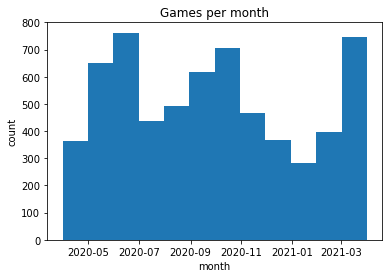

In [5]:
plt.hist(pd.to_datetime(matches['MatchDate']),bins=12)
plt.title('Games per month')
plt.xlabel('month')
plt.ylabel('count')

Probably should split last two-three months off as test set

# Looking at Matches  (Note: not games)

### Winloss_df

In [6]:
cutoff =10
wins_df = matches['WinnerId'].value_counts().reset_index().rename(columns={'index' : 'TeamId','WinnerId' : 'Wins'})
losses_df = matches['LoserId'].value_counts().reset_index().rename(columns={'index' : 'TeamId','LoserId' : 'Losses'})

winloss_df = wins_df.merge(losses_df,on = 'TeamId',how = 'outer').fillna(0)
winloss_df['total'] = winloss_df['Wins'] + winloss_df['Losses']
winloss_df = winloss_df.sort_values(by='total',ascending=False)

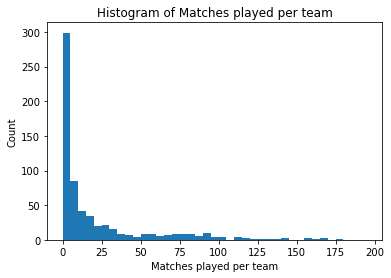

In [7]:
plt.hist(winloss_df['total'],bins=np.arange(0,200,5))
plt.title('Histogram of Matches played per team')
plt.xlabel('Matches played per team')
plt.ylabel('Count')

plt.show()

In [8]:
team_ids_over_cutoff = winloss_df[winloss_df['total']>=cutoff]['TeamId']
print(len(team_ids_over_cutoff))

244


628 Unique Teams (with matches played) in the dataset. Note: 'Teams' dataframe containts 636 teams.
244 Unique Teams with more than 10 matches played.

# Repeated Team Matchups


In [9]:
def create_both_team_ids(match_row):
    team1_id = match_row['WinnerId']
    team2_id = match_row['LoserId']
    if team1_id < team2_id:
        both_team_ids = str(team1_id) + '+' + str(team2_id)
    else:
        both_team_ids = str(team2_id) + '+' + str(team1_id)

    return both_team_ids
    

In [10]:
matches_adj = matches[['WinnerId','LoserId']]


In [11]:
# Replace all teams that didn't play enough games with TeamID=0.
# One can think of TeamId = 0 as a "pro team with no/minimal history"
matches_adj.loc[~matches_adj['WinnerId'].isin(team_ids_over_cutoff),'WinnerId'] = 0
matches_adj.loc[~matches_adj['LoserId'].isin(team_ids_over_cutoff),'LoserId'] = 0

/home/jolteon/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/jolteon/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [12]:
matches_adj['BothTeamIds'] = matches_adj.apply(create_both_team_ids,axis=1)

<ipython-input-12-34371418dcc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_adj['BothTeamIds'] = matches_adj.apply(create_both_team_ids,axis=1)


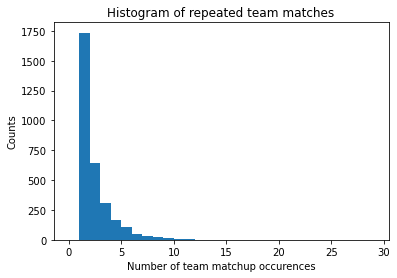

In [40]:
plt.hist(matches_adj['BothTeamIds'].value_counts(),bins=np.arange(0,30,1))
plt.title('Histogram of repeated team matches')
plt.xlabel('Number of team matchup occurences')
plt.ylabel('Counts')
plt.show()


In [14]:
matches_reduced=matches.copy()
matches_reduced = matches_reduced[matches_reduced['WinnerId'].isin(team_ids_over_cutoff) | matches_reduced['LoserId'].isin(team_ids_over_cutoff)]
matches_reduced['BothTeamIds'] = matches_reduced.apply(create_both_team_ids,axis=1)

In [15]:
matches_reduced.BothTeamIds.nunique()

3579

# Trying to get a sense of possible uneven distribution of games in train vs test set

### work in progress

In [24]:
team_id_many_games = winloss_df.head(20)['TeamId']

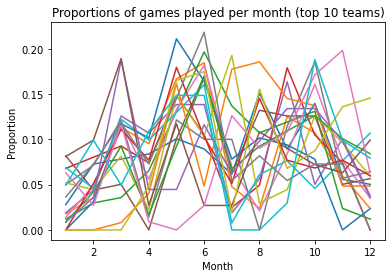

In [25]:
matches['MatchDate'] = pd.to_datetime(matches['MatchDate'])
matches['MatchMonth'] = matches['MatchDate'].dt.month
prop_list = []
for team_id in team_id_many_games:
    team_matches = matches[(matches['WinnerId']==team_id) | (matches['LoserId'] == team_id)] 
    team_prop = team_matches['MatchMonth'].value_counts(normalize=True)
    prop_list.append(team_prop.reset_index().set_index('index'))
prop_df  = pd.concat(prop_list,axis=1).transpose().fillna(0)
for (name, row) in prop_df.iterrows():
    plt.plot(row)
plt.title('Proportions of matches played per month (top 10 teams)')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.show()

# MHS functions:

In [34]:
def build_team_record_df(teams,demos):
    '''Creates team_record dataframe where each row is a Team, columns are various stats.
       Inputs are dataframes of the .csvs of the same name.
       Output is a dataframe indexed by teamid'''
    # All team IDs
    team_record = pd.DataFrame(teams['TeamId'].unique().astype(int),columns=['TeamId'])
    # Wins and losses (For games, not matches) by team ID
    game_wins = demos['WinnerId'].value_counts()
    game_losses = demos['LoserId'].value_counts()
    # merge wins and losses 
    team_record = team_record.merge(game_wins,left_on='TeamId',right_index=True,how='left').fillna(0).astype(int)
    team_record = team_record.merge(game_losses,left_on='TeamId',right_index=True,how='left').fillna(0).astype(int)
    team_record.rename(columns={"WinnerId": "GameWins", "LoserId": "GameLosses"},inplace=True)
    team_record['TotalGames'] = team_record['GameWins']+team_record['GameLosses'].astype(int)
    team_record['WinPercent'] = (team_record['GameWins']/team_record['TotalGames']).fillna(0)
    # Set index to team_id, to simplify things
    team_record.set_index('TeamId',drop=False,inplace=True)
    return team_record    

def win_pct_by_map(demos,team_record):
    '''Calculates win percentage by map for teams in team_record 
       and appends win/loss/matches/win_pct columns to team_record.
       demos - the demos dataframe, no alterations
       team_record - output of build_team_record_df, or a filtered version (i.e. removing few-match teams)
       '''
    
    # Count wins and losses by map and by team
    wins = demos.groupby(['WinnerId','MapName']).count()['MatchId']
    losses = demos.groupby(['LoserId','MapName']).count()['MatchId']
    
    # Fills the dataframe with wins and losses, sums for matches, divides for win_pct
    for m in demos['MapName'].unique():
        for t in team_record['TeamId']:
            # Wins
            try:
                team_record.loc[t,m+'_wins'] = wins[(t,m)]
            except KeyError:
                team_record.loc[t,m+'_wins'] = 0
            # Losses
            try:
                team_record.loc[t,m+'_losses'] = losses[(t,m)]
            except KeyError:
                team_record.loc[t,m+'_losses'] = 0
        team_record[m+'_games'] = team_record[m+'_wins'] + team_record[m+'_losses']
        # Map level win percentage
        team_record[m+'_win_pct'] = team_record[m+'_wins'] / team_record[m+'_games']

    return team_record

In [35]:
team_record = build_team_record_df(teams,demos)
team_record = win_pct_by_map(demos,team_record)

In [39]:
team_record.columns

Index(['TeamId', 'GameWins', 'GameLosses', 'TotalGames', 'WinPercent',
       'de_inferno_wins', 'de_inferno_losses', 'de_inferno_games',
       'de_inferno_win_pct', 'de_nuke_wins', 'de_nuke_losses', 'de_nuke_games',
       'de_nuke_win_pct', 'de_dust2_wins', 'de_dust2_losses', 'de_dust2_games',
       'de_dust2_win_pct', 'de_vertigo_wins', 'de_vertigo_losses',
       'de_vertigo_games', 'de_vertigo_win_pct', 'de_mirage_wins',
       'de_mirage_losses', 'de_mirage_games', 'de_mirage_win_pct',
       'de_train_wins', 'de_train_losses', 'de_train_games',
       'de_train_win_pct', 'de_overpass_wins', 'de_overpass_losses',
       'de_overpass_games', 'de_overpass_win_pct', 'de_cache_wins',
       'de_cache_losses', 'de_cache_games', 'de_cache_win_pct',
       'de_tuscan_wins', 'de_tuscan_losses', 'de_tuscan_games',
       'de_tuscan_win_pct', 'de_cobblestone_wins', 'de_cobblestone_losses',
       'de_cobblestone_games', 'de_cobblestone_win_pct'],
      dtype='object')

In [29]:
teams

,TeamId,HLTVTeamId,HLTVLink,TeamName,Country,Twitter,Facebook,Created,Updated
0,1,11035,https://www.hltv.org/team/11035/gladiators,GLADIATORS,Russia,"N,N",2021-04-09 18:44:23,2021-04-09 18:44:23,NaN
1,2,7900,https://www.hltv.org/team/7900/spirit-academy,Spirit Academy,CIS,"N,N",2021-04-09 18:44:24,2021-04-09 18:44:24,NaN
2,3,11080,https://www.hltv.org/team/11080/caronte,Caronte,Spain,"N,N",2021-04-09 18:44:28,2021-04-09 18:44:28,NaN
3,4,8362,https://www.hltv.org/team/8362/mad-lions,MAD Lions,Europe,"N,N",2021-04-09 18:44:29,2021-04-09 18:44:29,NaN
4,5,7718,https://www.hltv.org/team/7718/movistar-riders,Movistar Riders,Europe,"N,N",2021-04-09 18:44:29,2021-04-09 18:44:29,NaN
...,...,...,...,...,...,...,...,...,...
631,635,7174,https://www.hltv.org/team/7174/hatemania,hateMania,Ukraine,"N,N",2021-04-09 22:38:15,2021-04-09 22:38:15,NaN
632,636,11079,https://www.hltv.org/team/11079/trasko,Trasko,Ukraine,"N,N",2021-04-09 22:39:45,2021-04-09 22:39:45,NaN
633,637,11077,https://www.hltv.org/team/11077/verum,Verum,United States,"N,N",2021-04-09 22:40:06,2021-04-09 22:40:06,NaN
634,638,8161,https://www.hltv.org/team/8161/cyberstorm,Cyberstorm,North America,"N,N",2021-04-09 22:40:55,2021-04-09 22:40:55,NaN
